In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import requests
import os

plt.style.use('seaborn-whitegrid')

In [88]:
#Para generar los puntos aleatorios, probemos con un arreglo como el siguiente:
x = np.linspace(0, 2, 15)
sigma = 0.2

#Queremos tender a valores que coincidan con y = 3x + 2, por tanto generamos para cada x una y:
error = np.random.normal(0, 0.2, 15)
y = 3 * x + 2 + error

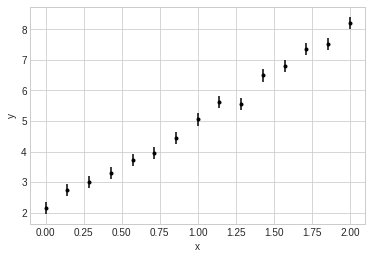

In [118]:
plt.errorbar(x,y, yerr = sigma, fmt='.k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [53]:
#Para guardar mis arreglos en un archivo en orden x, y, yerr:
np.savetxt('Prueba.dat', (x, y, error))

In [61]:
a = np.random.normal(3.1, 0.2, 1000)
b = np.random.normal(1.8, 0.2, 1000)

def linea(x, a, b):
    return a * x + b

In [105]:
#Para la determnación de a, b promedios, se hace uso de la función chi^2:
N = 15
aux = 0
chi = []
for i in range(len(a)):
    for j in range(len(y)):
        aux += (y[j] - linea(x[j], a[i], b[i])) ** 2 / error[j] ** 2
    chi.append(aux)
    aux = 0
    
np.min(chi)

12.91080055577041

In [109]:
a_n = a[np.where(chi == np.min(chi))]
a_n

array([3.0078618])

In [110]:
b_n = b[np.where(chi == np.min(chi))]
b_n

array([2.00996885])

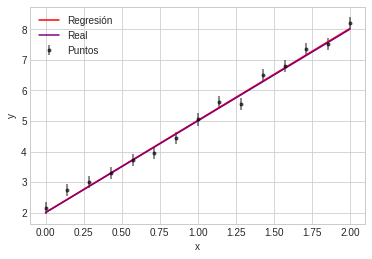

In [119]:
plt.plot(x, a_n * x + b_n, color = 'red', label = 'Regresión')
plt.errorbar(x, y, yerr = sigma, color = 'purple', fmt='.k', alpha = 0.6, label = 'Puntos')
plt.plot(x, 3 * x + 2, color = 'purple', label = 'Real')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

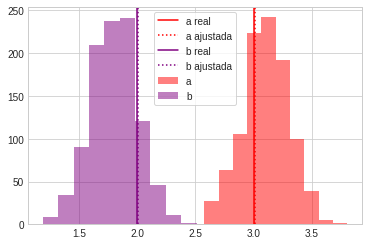

In [111]:
#Observemos la distribución de las a's, b's generadas:
plt.hist(a, alpha = 0.5, color = 'red', label = 'a')
plt.hist(b, alpha = 0.5, color = 'purple', label = 'b')
plt.axvline(3, color = 'red', label = 'a real')
plt.axvline(a_n, linestyle = ':', color = 'red', label = 'a ajustada')
plt.axvline(2, color = 'purple', label = 'b real')
plt.axvline(b_n, linestyle = ':', color = 'purple', label = 'b ajustada')
plt.legend(frameon = True)
plt.show()

In [114]:
#Otro método:
def chisq(theta, data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    
    model = linea(x, theta[0], theta[1])
    chisq = (y - model) ** 2 / y_err ** 2
    return chisq.sum()

In [115]:
chisq_ = np.zeros_like(a)
for i in range(len(a)):
    chisq_ = chisq((a[i], b[i]), [x, y, error])

In [117]:
min_chisq = np.min(chisq_)
a_b, b_b = a[np.where(chi == np.min(chi))], b[np.where(chi == np.min(chi))]
a_b, b_b

(array([3.0078618]), array([2.00996885]))